# Undistort Dataset
[https://github.com/jayrambhia/Vision/blob/master/OpenCV/C%2B%2B/stereocalibrate.cpp](https://github.com/jayrambhia/Vision/blob/master/OpenCV/C%2B%2B/stereocalibrate.cpp)

In [1]:
class Args:
    uncalibrated_dataset_path = "../../resources/images/uncalibrated/calibration_dataset.npz"
    calibrated_dataset_path = "../../resources/images/calibrated/dataset_1.npz"
    calibration_matrix_path = "../../resources/calibrations/calibration.yml"
    save_calibrated_images = False
args = Args()

In [2]:
from models.dataset.DatasetHelper import openImageDataset, saveImageDataset, load_coefficients
from models.dataset.undistort import undistort_images
from matplotlib import pyplot as plt

In [3]:
# Open Dataset and calibration file
rs_rgb, rs_z, zv_rgb, zv_z = openImageDataset(args.uncalibrated_dataset_path)
print(f"Opened dataset containing {len(rs_rgb)} image sets")

## Load Coefficients
transformation_matrix = load_coefficients(path=args.calibration_matrix_path)

## Undistort Images
import cv2
import numpy as np

CM1 = np.identity(3)
CM2 = np.identity(3)
D1 = np.zeros(4)
D2 = np.zeros(4)
R = transformation_matrix[0:3, 0:3]
T = transformation_matrix[0:3, 3]
img1_size = rs_rgb[0].shape[:2]
img2_size = zv_rgb[0].shape[:2]

R1, R2, P1, P2, Q, _, _ = cv2.stereoRectify(CM1, D1, CM2, D2, img1_size, R, T)
print(R1)

Opened dataset containing 24 image sets
[[ 0.99049969  0.10591973 -0.0877005 ]
 [-0.10022115  0.11933539 -0.98778276]
 [-0.09415991  0.98718796  0.12881706]]


In [4]:
map1x, map1y = cv2.initUndistortRectifyMap(CM1, D1, R1, P1, img1_size, cv2.CV_32FC1)
map2x, map2y = cv2.initUndistortRectifyMap(CM2, D2, R2, P2, img2_size, cv2.CV_32FC1)

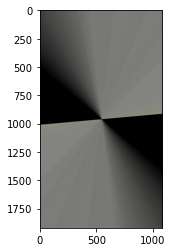

In [5]:
img1 = rs_rgb[0]
img2 = zv_rgb[0]

imgU1 = cv2.remap(img1, map1x, map1y, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT)
imgU2 = cv2.remap(img2, map2x, map2y, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT)

plt.imshow(imgU1)